# Visualization

## Abstract

This notebook is just a place to make visualizations to be used elswhere.

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot
%matplotlib inline
vapeplot.set_palette("macplus")

### CSV Read-in

In [4]:
df = pd.read_csv("../data/labeled_2.csv")
df.head()

Unnamed: 0               artist_id        artist                album_id  \
0           0  1L0y9srZMyh9XUnYGv37IP  'Til Tuesday  67OxSfZotEq8cCa5SCeX5r   
1           1  1L0y9srZMyh9XUnYGv37IP  'Til Tuesday  67OxSfZotEq8cCa5SCeX5r   
2           2  1L0y9srZMyh9XUnYGv37IP  'Til Tuesday  67OxSfZotEq8cCa5SCeX5r   
3           3  1L0y9srZMyh9XUnYGv37IP  'Til Tuesday  67OxSfZotEq8cCa5SCeX5r   
4           4  1L0y9srZMyh9XUnYGv37IP  'Til Tuesday  67OxSfZotEq8cCa5SCeX5r   

                  album_names                track_id  track_number  \
0  Everything's Different Now  5n9QFM4EiMeLGO0Mbwaqov           1.0   
1  Everything's Different Now  0BKslA1XqG8HBUKBl4d7EN           2.0   
2  Everything's Different Now  5G7NBdQLHc7GkehNmLG3yJ           3.0   
3  Everything's Different Now  0J6nZDgEuwXtECq8Pukn1n           4.0   
4  Everything's Different Now  3Lm7hSTabr01oav0WdSsuD           5.0   

                  track_title  track_duration  track_disc_number  ...  \
0  Everything's Different Now        236733.0                1.0  ...   
1               Rip In Heaven        211200.0                1.0  ...   
2                  Why Must I        221000.0                1.0  ...   
3                 J For Jules        265493.0                1.0  ...   
4   (Believed You Were) Lucky        216973.0                1.0  ...   

   acousticness  valence    tempo  is_live  is_instrumental  label  key  \
0        0.0693    0.730  123.777        0                0      4   A#   
1        0.4280    0.815  131.809        0                0     12    E   
2        0.2290    0.838   96.486        0                0     13   C#   
3        0.4620    0.262  151.651        0                0      4   A#   
4        0.4480    0.495  124.315        0                0     10    F   

   time_signature  instrumentalness  liveness  
0               4          0.000033    0.1080  
1               4          0.000000    0.3470  
2               4          0.000035    0.3230  
3               4          0.000001    0.1190  
4               4          0.000002    0.0727  

[5 rows x 24 columns]

In [8]:
key_order = list(set(df.key.values))
key_order.sort()

/anaconda3/envs/spotidsi/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


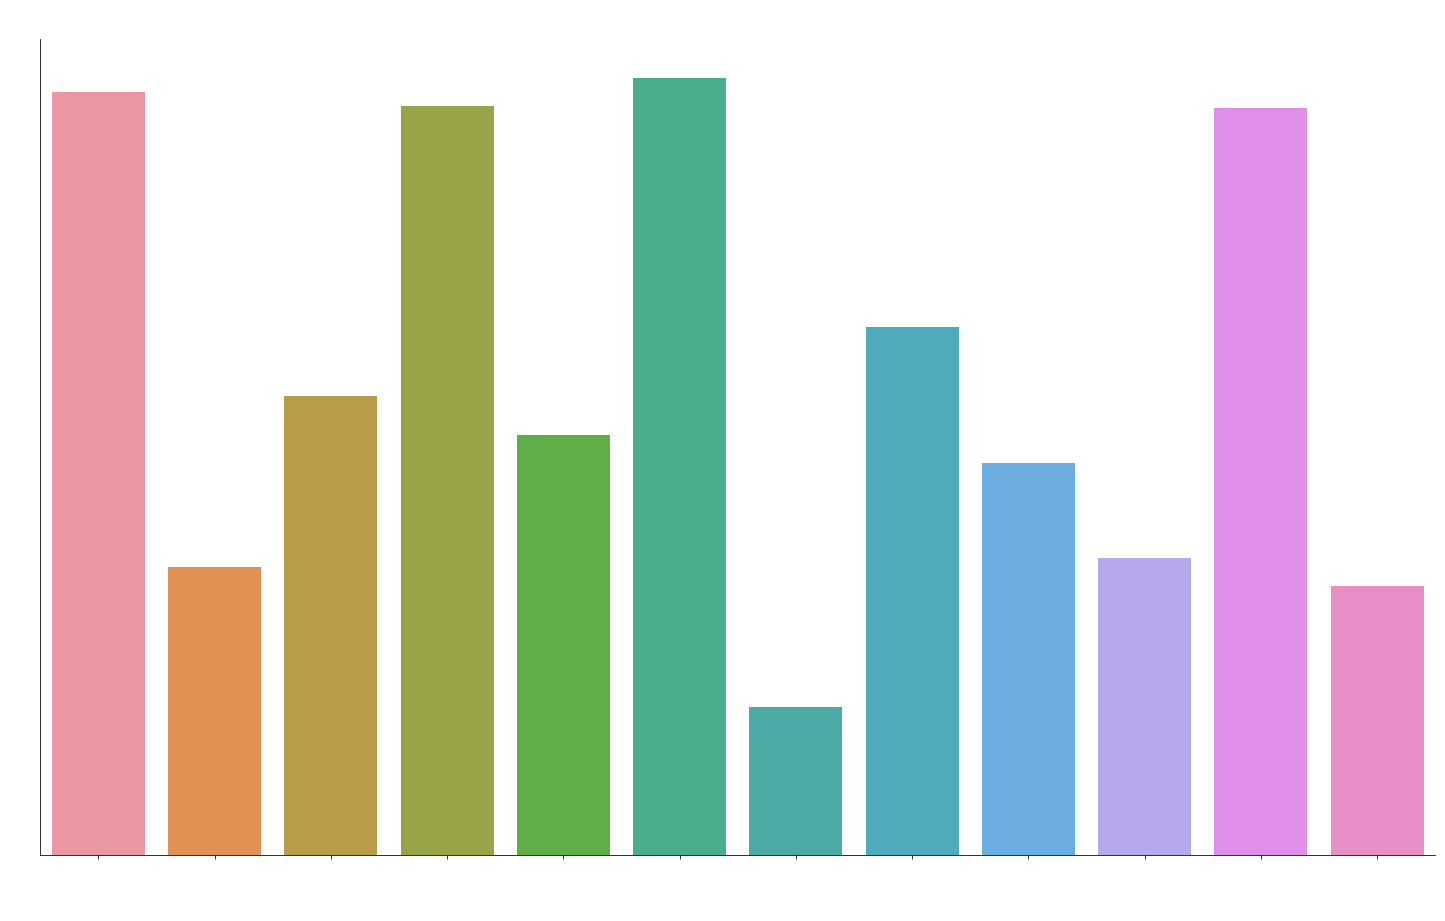

In [43]:
plt.figure(figsize=(25,15))
sns.countplot(x="key",data=df, order=key_order)
plt.xlabel("Key",size=30, color="w")
plt.xticks(size=20, color="w")
plt.ylabel("Frequency",size=30, color="w")
plt.yticks([])
plt.title("Key Center Frequencies", size=35, color="w")
vapeplot.despine(plt.axes())

/anaconda3/envs/spotidsi/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


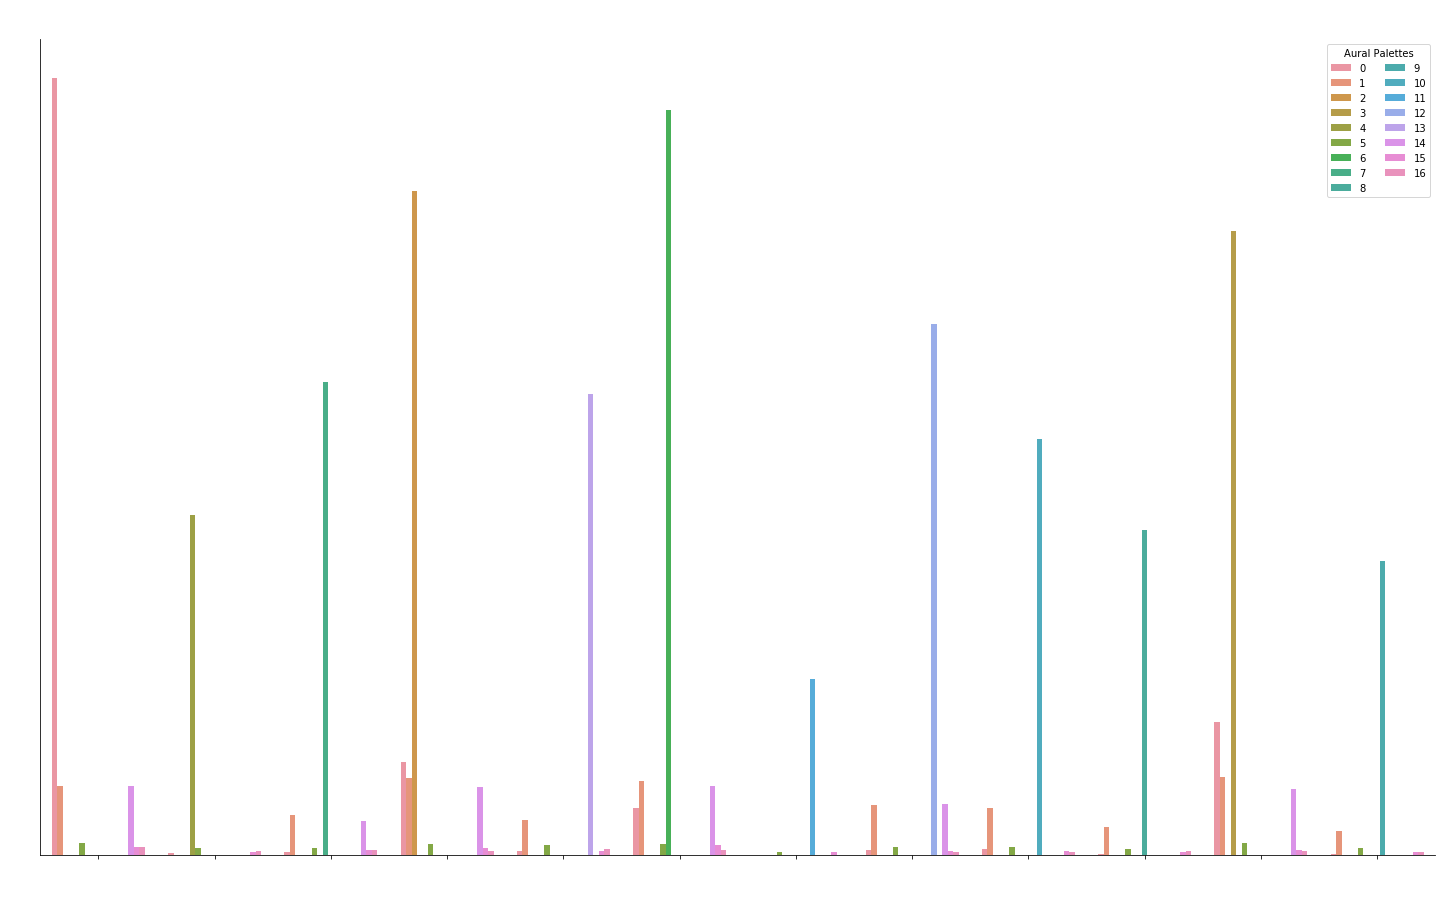

In [44]:
plt.figure(figsize=(25,15))
sns.countplot(x="key",data=df, hue="label", order=key_order)
plt.xlabel("Key",size=30, color="w")
plt.xticks(size=20, color="w")
plt.ylabel("Frequency",size=30, color="w")
plt.yticks([])
plt.title("Key Center Frequencies By Aural Palette", size=35, color="w")
plt.legend(title="Aural Palettes", ncol=2)
vapeplot.despine(plt.axes())

In [31]:
subset=["track_duration", "energy", "danceability", "label"]
inputs = ["track_duration", "energy", "danceability"]

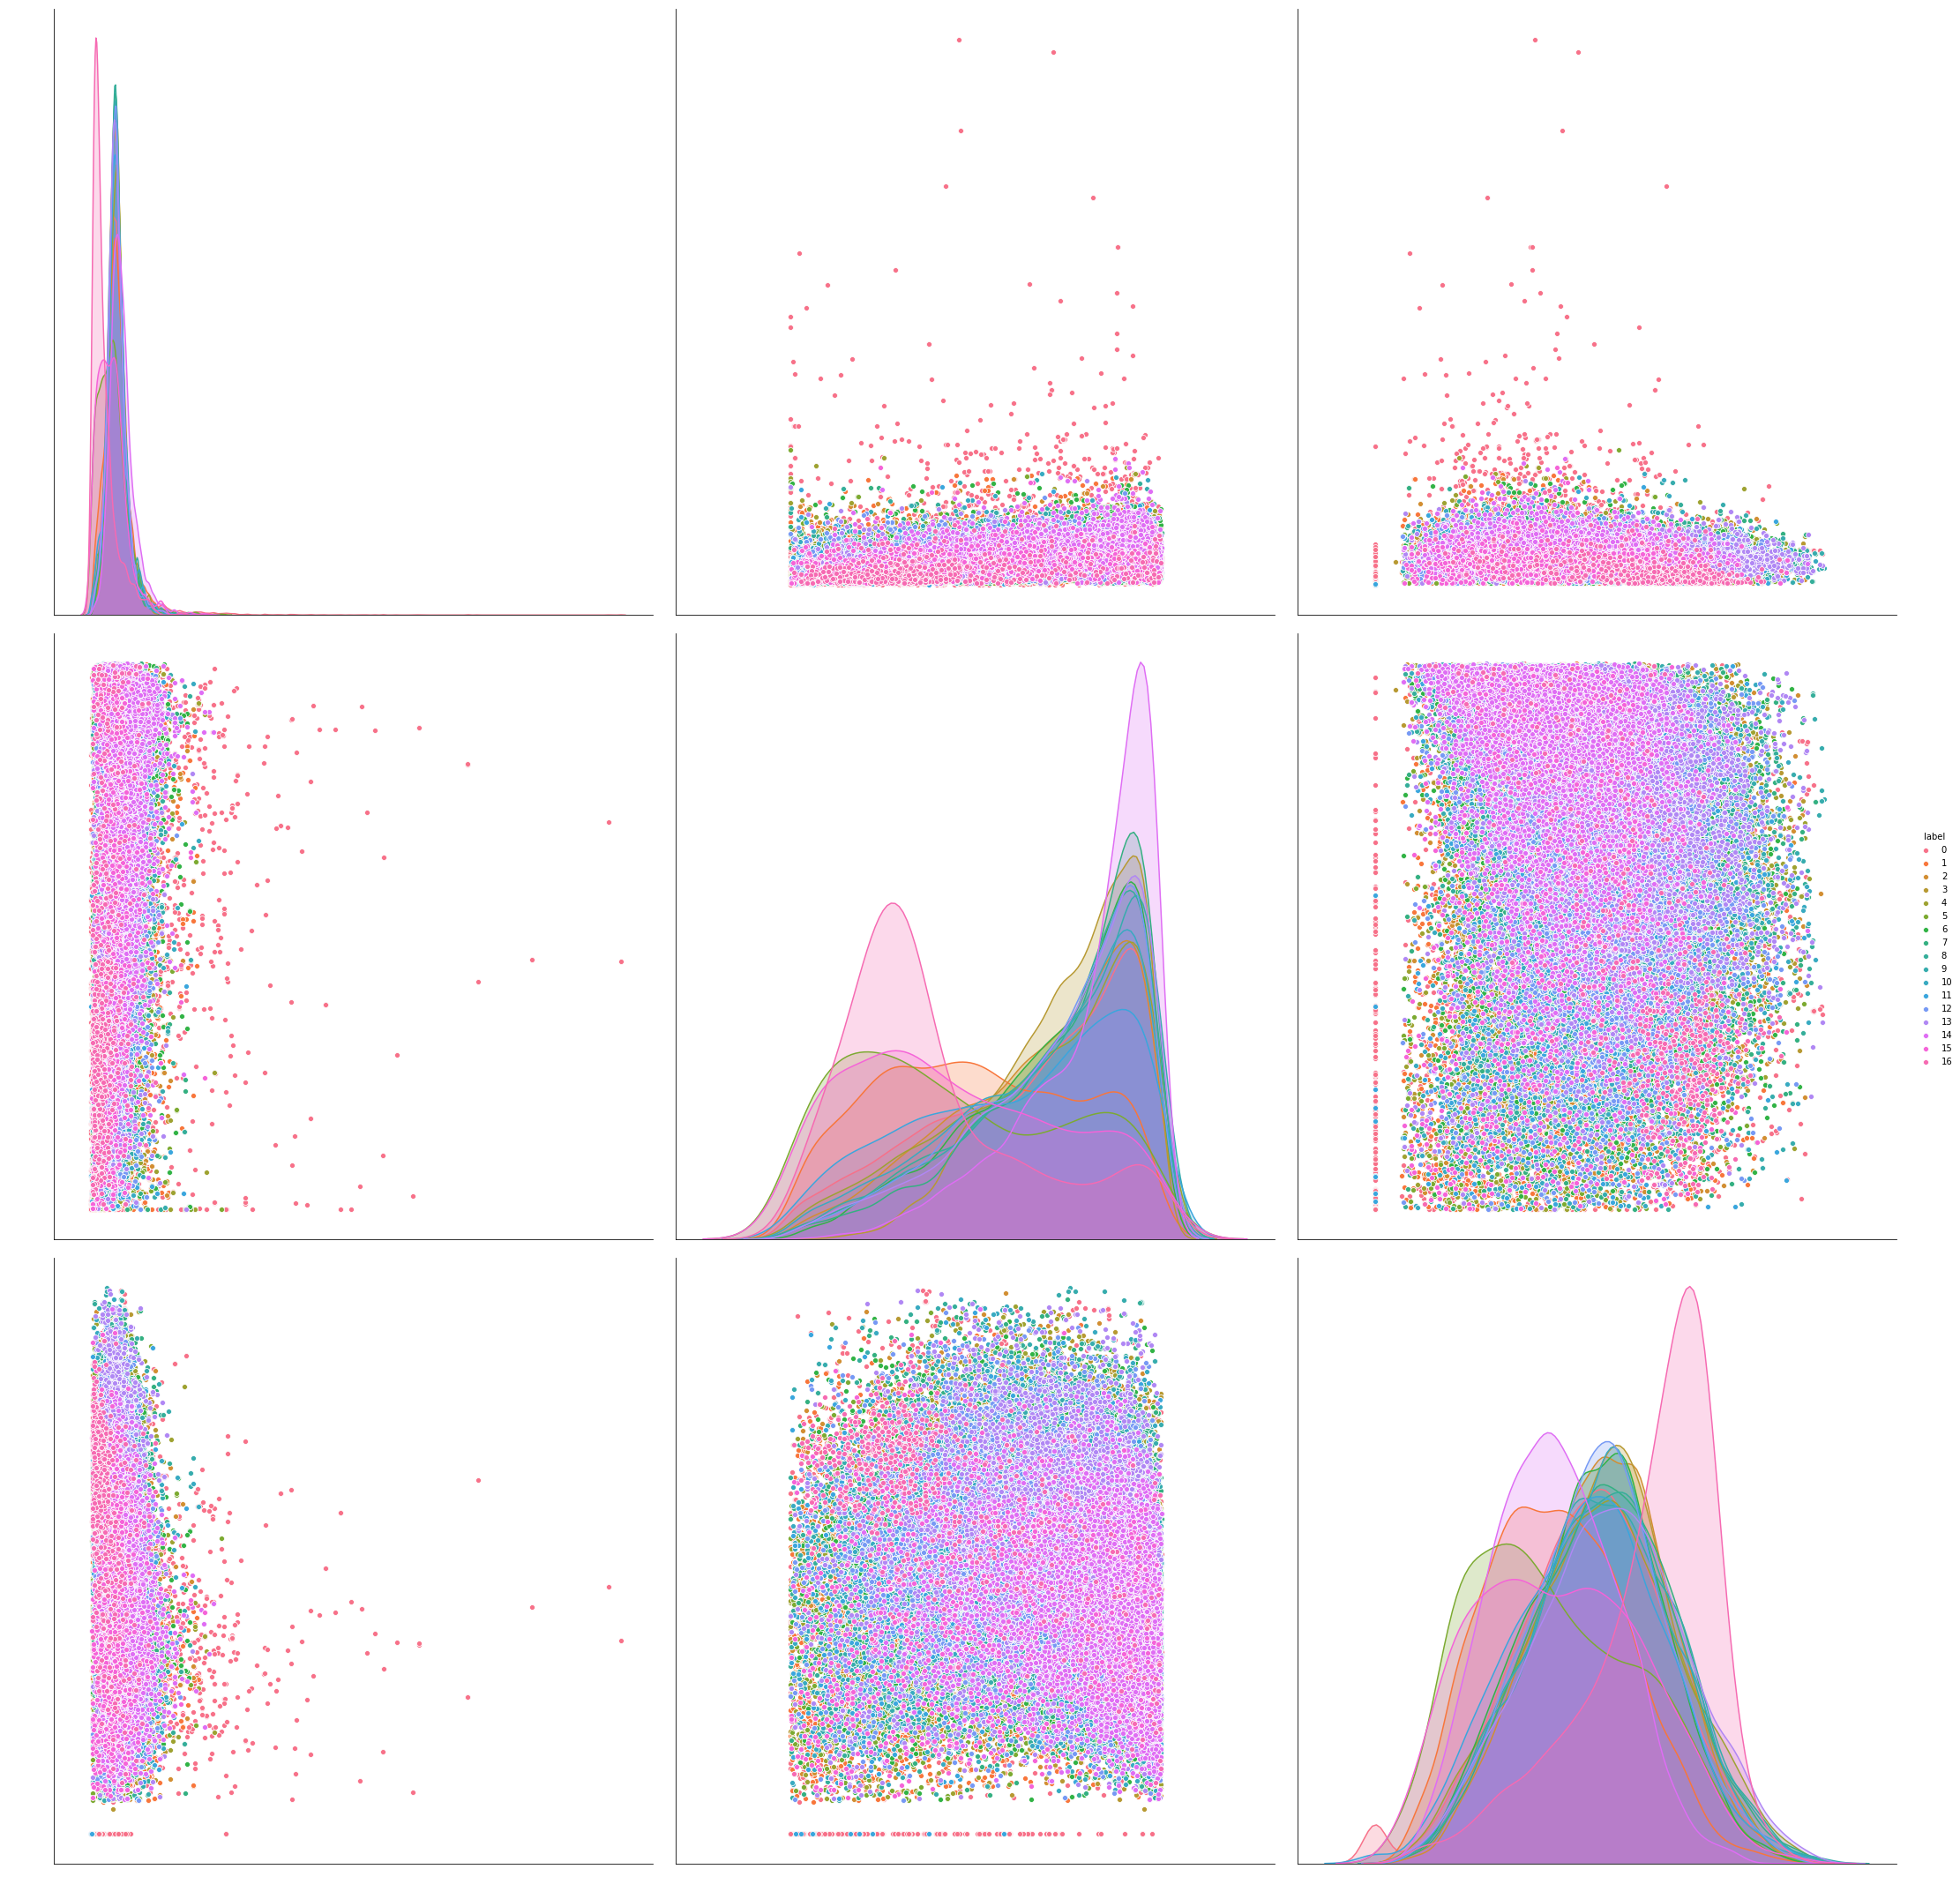

In [46]:
g = sns.pairplot(df[subset], vars=inputs, height=10, hue="label")
for ax in g.axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(ax.get_xlabel().replace("_"," ").capitalize(), color="w", size=30)
    ax.set_ylabel(ax.get_ylabel().replace("_"," ").capitalize(), color="w", size=30)
plt.savefig("./clustering.png")